# Series de Tiempo

## 0. Fechas

En programación es fundamental trabajar con fechas y horas. Pero basta un poco de reflexión al respecto para ver que no es, en principio, tan inmediato como sumar y restar números. Sumar horas puede hacer que cambiemos de día, mes y hasta año. Catorce días luego del 15 de Febrero puede dar como resultado el 01 de Marzo o el 29 de Febrero si se trata de un año bisiesto. 

El famoso [Error del Milenio](https://en.wikipedia.org/wiki/Year_2000_problem) era un problema de fechas. Si bien no significó el fin del mundo, sí trajo algunos problemas (por suerte menores) y dolores de cabeza. Esto fue gacias a todas las personas que trabajaron para evitar mayores inconvenientes. Sin embargo, no se trata de un problema resuelto. Tenemos, hacia adelante, el [problema del año 2038](https://en.wikipedia.org/wiki/Year_2038_problem), pero sus inconvenientes ya [están aquí](https://nitter.net/jxxf/status/1219009308438024200). Un problema similar ocurrió en [algunos dispositivos GPS durante 2019](https://www.theverge.com/2019/3/8/18255847/gps-week-rollover-issue-2019-garmin-tomtom-devices-affected).

Otros problemas más mundanos involucran el formato en el que solemos encontrar fechas. Por ejemplo, en muchos países es común escribir Día - Mes - Año (DD - MM - YYYY), mientras que en EEUU es común Mes - Día - Año (MM - DD - YYYY). Desde un punto de vista computacional, es más cómodo Año - Mes - Día (YYYY - MM - DD), ya que eso permite ordenar fácilmente de menor a mayor. Eso sin considerar husos horarios, cambios en horario de verano e invierno, y un innumerable conjunto de problemas más. 

En Series de Tiempo - como te imaginarás - también es fundamental trabajar con fechas y horas. Solemos tener que prestar atención a cómo figura la fecha en nuestros datos y cómo adaptarla a un formato único para todas las fuentes de datos que vayamos a usar. Luego, tenemos que poder operar con esas fechas y horas. 

Por suerte, todos los lenguajes de programación cuentan con módulos para trabajar con fechas y horas. En Python, el módulo estándar es `datetime`. No entraremos en grandes detalles sobre cómo es su uso, solamente haremos algunas demostraciones en las siguientes celdas. Pero sí te recomendamos googlear cómo operar con este módulo cuando estés trabajando con fechas, ya que muchos problemas con los que uno se encuentra ya están resueltos. Te dejamos una muy buena introducción al módulo [aquí](https://realpython.com/python-datetime/).

El módulo `datetime` cuenta con una clase principal, `datetime` (se llama igual que el módulo)

In [ ]:
import datetime

una_fecha = datetime.datetime(year=2020, month=7, day=27)
una_fecha

datetime.datetime(2020, 7, 27, 0, 0)

Pero si imprimimos

In [ ]:
print(una_fecha)

2020-07-27 00:00:00


Notar que también tiene lugar para el horario

In [ ]:
una_fecha = datetime.datetime(year=2020, month=7, day=27, hour = 7, minute = 30)
print(una_fecha)

2020-07-27 07:30:00


Dentro de sus atributos, podemos resaltar `date` y `time`, que **también son clases dentro del módulo**.

In [ ]:
print(una_fecha.date())
una_fecha.date()

2020-07-27


datetime.date(2020, 7, 27)

In [ ]:
print(una_fecha.time())
una_fecha.time()

07:30:00


datetime.time(7, 30)

`datetime` ya sabe operar con fechas. Por ejemplo, podemos sumar días y horas a `una_fecha`

In [ ]:
print(una_fecha + datetime.timedelta(days = 40, hours = 10))

2020-09-05 17:30:00


Una funcionalidad sumamente útil es crear objetos `datetime` a partir de texto (strings) con el método `strptime()`

In [ ]:
#aveces pandas no transforma bien las fechas porque pueden estar en string, entonces se usa el datetime


In [ ]:
fecha_en_string = '2019/08/27'
print(datetime.datetime.strptime(fecha_en_string, '%Y/%m/%d'))
#%b nos habla de del mes pero corto . con diminutivo u otras cosas, son formas de codificar las fechas
#https://www.w3schools.com/python/python_datetime.asp

In [ ]:
fecha_en_string = '2019-08-27'
print(datetime.datetime.strptime(fecha_en_string, '%Y-%m-%d'))

2019-08-27 00:00:00


In [ ]:
fecha_en_string = '2019-08-27 15:30:10' # este es un formato sumamente estándar
print(datetime.datetime.strptime(fecha_en_string, '%Y-%m-%d %H:%M:%S'))

2019-08-27 15:30:10


Para cualquier formato de fechas que encuentes, siempre encontrarás una forma de que el módulo lo reconozca.

También existe su contraparte, `strftime()`, para llevar de `datetime` a texto

In [ ]:
print(una_fecha.strftime('%Y-%m-%d %H:%M:%S'))
print(una_fecha.strftime('%H:%M:%S %d-%m-%Y'))

2020-07-27 07:30:00
07:30:00 27-07-2020


Las funcionalidades son muchas y no vale la pena que las expliquemos todas acá. Pero, insistimos en una cosa: cualquier problema con el que te encuentres, en el 99.99% de los casos alguien ya lo tuvo y lo resolvió. Lo más probable es que hasta se trate de un método ya incorporado. Así que vale la pena investigar a medida que necesites operar con fechas y horarios.

**Para investigar:** ¿qué es el *Epoch Time*?

## 1. Análisis Exploratorio de Datos

Ahora sí, arranquemos con Series de Tiempo. Vamos a trabajar con un dataset de temperaturas históricas en la ciudad de Buenos Aires.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS_Bitácora_41_Temperatura.csv')
data.head()

,dia,mes,anio,Tmax,Tmin
0,1,1,1959,25.6,11.6
1,2,1,1959,26.2,16.4
2,3,1,1959,27.3,18.8
3,4,1,1959,25.4,16.6
4,5,1,1959,21.6,10.7


Si bien está la información de las fechas en ese dataset, no está en un formata fecha como `datetime`. Pandas incorpora varias funcionalidades para trabajar con fechas y horarios, que puedes investigar [aquí](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html) (tenlo a mano pero no hace falta que lo leas ahora).

Usaremos la función `to_datetime` para agregar una columna con las fechas.

In [ ]:
#para una serie de tiempo necesito una columna tipo fecha y luego las variables.
#Entonces adhiero
data['fecha'] = pd.to_datetime({'year':data.anio, 'month': data.mes, 'day': data.dia})
data.head()

,dia,mes,anio,Tmax,Tmin,fecha
0,1,1,1959,25.6,11.6,1959-01-01
1,2,1,1959,26.2,16.4,1959-01-02
2,3,1,1959,27.3,18.8,1959-01-03
3,4,1,1959,25.4,16.6,1959-01-04
4,5,1,1959,21.6,10.7,1959-01-05


Grafiquemos las series:

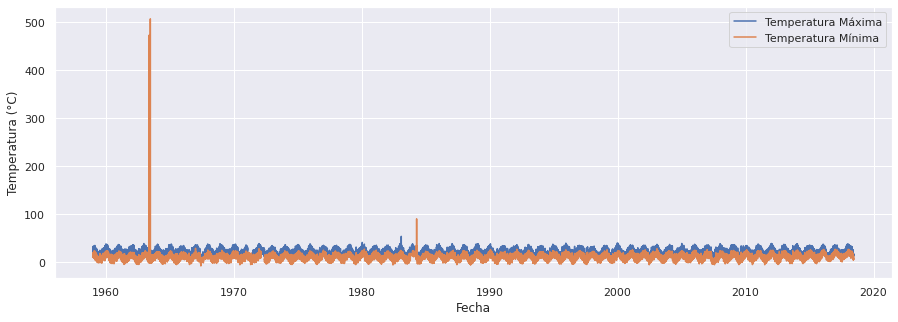

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(data.fecha, data.Tmax, label = 'Temperatura Máxima')
plt.plot(data.fecha, data.Tmin, label = 'Temperatura Mínima')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
# plt.ylim(-10,40)
plt.show()

¿Te parece que hay valores atípicos? Modifica el gráfico para que los valores atípicos no impidan su visualización. ¿Hay estacionalidad?

Las series de tiempo de temperatura se ven "ruidosas" o saturadas. Notar que tenemos temperaturas diarias (frecuencia diaria) para una ventana de tiempo de aproximadamente 50 años. Esto hace que el gráfico se sature. Una opción cómoda en estos casos es resamplear la serie a una frecuencia menor, por ejemplo semanal, para suavizar el gráfico.

In [ ]:
semanal = data.resample('W', on = 'fecha').mean() #W es de Weekly 7 dias, promedio movil de 7 días centrado en el 4 o 5 
semanal.head() #es un promedio movil de 7 días. junta en undía el promedio

,dia,mes,anio,Tmax,Tmin
fecha,,,,,
1959-01-04,2.500000,1.000000,1959.0,26.125000,15.850000
1959-01-11,8.000000,1.000000,1959.0,26.600000,12.785714
1959-01-18,15.000000,1.000000,1959.0,28.300000,16.885714
1959-01-25,22.000000,1.000000,1959.0,31.300000,16.400000
1959-02-01,24.571429,1.142857,1959.0,27.633333,16.014286


La información que hay ahora en las columnas `día`, `mes` y `anio` no tiene mucho sentido, así que las tiramos.

In [ ]:
semanal.drop(columns = ['dia', 'mes', 'anio'], inplace = True)
semanal.head()

,Tmax,Tmin
fecha,,
1959-01-04,26.125000,15.850000
1959-01-11,26.600000,12.785714
1959-01-18,28.300000,16.885714
1959-01-25,31.300000,16.400000
1959-02-01,27.633333,16.014286


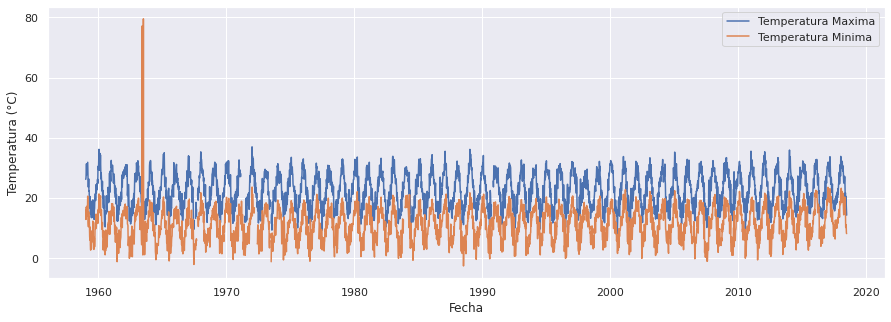

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(semanal.index, semanal.Tmax, label = 'Temperatura Maxima')
plt.plot(semanal.index, semanal.Tmin, label = 'Temperatura Minima')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
# plt.xlim(datetime.date(1990,1,1), datetime.date(2018,1,1))
# plt.ylim(-10,40)
plt.legend()
plt.show()

**Para pensar y probar**: 
1. ¿Qué pasó con los valores atípicos?¿Cómo los sacarías?
1. ¿Puedes ver estacionalidad y tendencia?
1. ¿Hay valores faltantes? Ten en cuenta que pueden haber dos tipos de valores faltantes. Uno corresponde a una fecha sin su valor de temperatura (es decir, está la fecha, no la temperatura). El otro corresponde a una fecha que no está (no está la fecha ni la temperatura). En ese caso, **no aparecerá con `isna()`.** ¿Cómo los encontrarías? [Pista](https://stackoverflow.com/questions/56040743/check-if-list-of-dates-is-complete-in-python-using-pandas). ¿Cómo los imputarías (cualquiera de los dos casos)?


**Ejercicio:** resamplea la serie a frecuencia mensual y grafica.

In [ ]:
mensual = data.resample('M', on = 'fecha').mean() #M es de Month
mensual.head() #es un promedio movil de 7 días. junta en undía el promedio

,dia,mes,anio,Tmax,Tmin
fecha,,,,,
1959-01-31,16.0,1.0,1959.0,28.183871,15.554839
1959-02-28,14.5,2.0,1959.0,NaN,16.832143
1959-03-31,16.0,3.0,1959.0,25.606452,13.861290
1959-04-30,15.5,4.0,1959.0,19.143333,9.946667
1959-05-31,16.0,5.0,1959.0,17.270968,6.367742


In [ ]:
mensual.drop(columns = ['dia', 'mes', 'anio'], inplace = True)
mensual.head()

,Tmax,Tmin
fecha,,
1959-01-31,28.183871,15.554839
1959-02-28,NaN,16.832143
1959-03-31,25.606452,13.861290
1959-04-30,19.143333,9.946667
1959-05-31,17.270968,6.367742


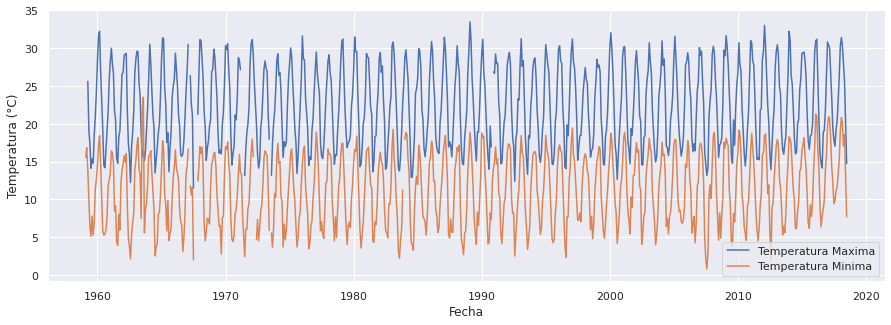

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(mensual.index, mensual.Tmax, label = 'Temperatura Maxima')
plt.plot(mensual.index, mensual.Tmin, label = 'Temperatura Minima')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
# plt.xlim(datetime.date(1990,1,1), datetime.date(2018,1,1))
# plt.ylim(-10,40)
plt.legend()
plt.show()

In [ ]:
#¿Puedes ver estacionalidad y tendencia?
#¿Hay valores faltantes? Ten en cuenta que pueden haber dos tipos de valores faltantes. Uno corresponde a una fecha sin su valor de temperatura (es decir, está la fecha, no la temperatura). El otro corresponde a una fecha que no está (no está la fecha ni la temperatura). En ese caso, no aparecerá con isna(). ¿Cómo los encontrarías? Pista. ¿Cómo los imputarías (cualquiera de los dos casos)?

## 2. Componentes de la Serie

Obtener componentes de una Serie de Tiempo es un tema amplio y, como siempre, depende del problema en el que estás trabajando. Algunas series se comportan como $Tendencia + Estacionalidad + Ruido$, mientras que otras tienen comportamientos más complejos, como $Tendencia * Estacionalidad + Ruido$. Existen muchas formas de obtener las componentes, pero no todas funcionarán en todos los casos. Además, cada técnica tiene sus ventajas y desventajas. Vamos a hacer una enumeración y demostración no exhaustiva de algunos métodos, simplemente para que te lleves una idea de qué cosas se pueden hacer fácilmente.

* El método más sencillo se conoce como *media móvil*. Consiste en tomar una ventana de tiempo suficientemente grande y promediar la serie sobre esa ventana. De esta forma, obtienes la tendencia. Tomate un tiempo para pensar qué significa *suficientemente grande*. Una característica de este método es que no asume ninguna forma para la serie de tiempo - a diferencia del que te contaremos a continuación - así que suele funcionar en muchos casos.

* Supongamos que tienes motivos para creer que la tendencia sigue un comportamiento lineal. Entonces, basta con ajustar una regresión lineal a la serie (antes también la puedes haber promediado con el método anterior) para obtener la tendencia. Este método también sirve si tienes motivos para creer que la tendencia sigue una forma arbitraria pero conocida (por ejemplo, cuadrática, exponencial, tipo seno o coseno, etc.).

Una vez que obtienes la tendencia, en ambos casos puedes tomar la serie original, restar la tendencia y obtener una nueva serie sin tendencia, donde esperamos que sea la componente estacional la que domine.

Luego, para obtener componentes estacionales, se suele asumir una forma armónica (tipo seno o coseno). Es decir, se puede hacer un procedimiento similar al que hiciste con la tendencia (ajustar y restar a la serie sin tendencia) para obtener ruido + componentes restantes.

Veamos un poco como se traduce esto en el código.

**Media movil**

El proceso de tomar una ventana, trasladarlo a lo largo de una serie de tiempo y hacer alguna operación en esa ventana se conoce como *rolling window*. En general, se utiliza junto con la media, pero también se podría obtener el máximo, mínimo o cualquier otro estadístico.

Vamos a operar sobre la serie semanal promedio. Comenzamos sacando outliers y rellenando valores faltantes. ¿Qué hace la función `interpolate`?

In [ ]:
semanal.Tmax[semanal.Tmax > 50] = np.nan #otra forma de sacar los outliers, con resampleo bajo la intensidad del outlier
semanal.Tmin[semanal.Tmin > 50] = np.nan

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


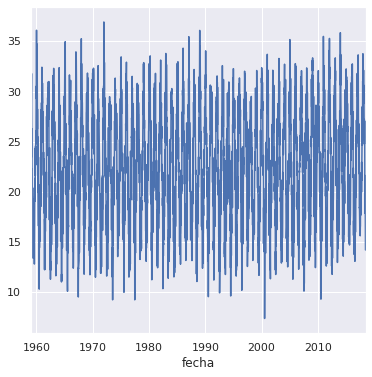

In [ ]:
plt.figure()
semanal.Tmax.plot()

In [ ]:
print(semanal.isna().sum())
semanal = semanal.interpolate() # interpolo los nans entre los elementos
print(semanal.isna().sum())

Tmax    39
Tmin    32
dtype: int64
Tmax    0
Tmin    0
dtype: int64


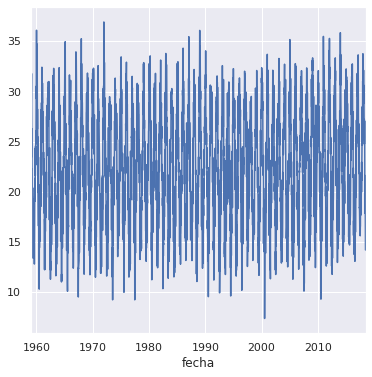

In [ ]:
semanal.Tmax.plot()

In [ ]:
print(%save)

In [ ]:
semanal['Tmean'] = (semanal.Tmax + semanal.Tmin)/2
semanal

,Tmax,Tmin,Tmean
fecha,,,
1959-01-04,26.125000,15.850000,20.987500
1959-01-11,26.600000,12.785714,19.692857
1959-01-18,28.300000,16.885714,22.592857
1959-01-25,31.300000,16.400000,23.850000
1959-02-01,27.633333,16.014286,21.823810
...,...,...,...
2018-05-20,17.857143,10.242857,14.050000
2018-05-27,20.500000,10.085714,15.292857
2018-06-03,18.071429,11.014286,14.542857


In [ ]:
ventana = int(365*2/7)
semanal_promedio_tendencia = semanal.Tmean.rolling(window=ventana, center = True).mean()
semanal_promedio_tendencia #rolling es la ventana movil (el ancho de la ventana, la tendencia varía. mas pegada a la serie o más gruesa respecto a la misma.)
#los primeros datos por la ventana movil y los ultimos son nulos porque descarto estos datos.

fecha
1959-01-04   NaN
1959-01-11   NaN
1959-01-18   NaN
1959-01-25   NaN
1959-02-01   NaN
              ..
2018-05-20   NaN
2018-05-27   NaN
2018-06-03   NaN
2018-06-10   NaN
2018-06-17   NaN
Freq: W-SUN, Name: Tmean, Length: 3103, dtype: float64

¿Por qué aparecen tanto valores faltantes?¿Cuántos son?¿A qué corresponde?

Grafiquemos

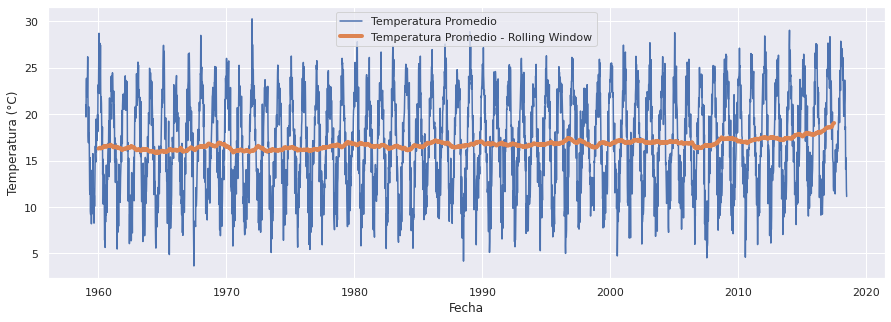

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(semanal.index, semanal.Tmean, label = 'Temperatura Promedio')
plt.plot(semanal_promedio_tendencia, lw = 4, label = 'Temperatura Promedio - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

Las medidas moviles sirven para sacar tendencia y con este primer filtro. Vemos globalmente

**Tendencia Lineal**

Este método consiste simplemente en ajustar una regresión lineal a la serie. Ten en cuenta que la validez de este método es muy limitada.

Para comenzar, lo único que tenemos que tener en cuenta es que no podemos ajustar una regresión lineal con las fechas así como las tenemos, por lo que tenemos que pasarlas a un formato numérico.

In [ ]:
semanal['fecha_numeros']=semanal.index.map(datetime.datetime.toordinal)
semanal.head()

,Tmax,Tmin,Tmean,fecha_numeros
fecha,,,,
1959-01-04,26.125000,15.850000,20.987500,715148
1959-01-11,26.600000,12.785714,19.692857,715155
1959-01-18,28.300000,16.885714,22.592857,715162
1959-01-25,31.300000,16.400000,23.850000,715169
1959-02-01,27.633333,16.014286,21.823810,715176


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(semanal.fecha_numeros.values.reshape(-1, 1), semanal.Tmean)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

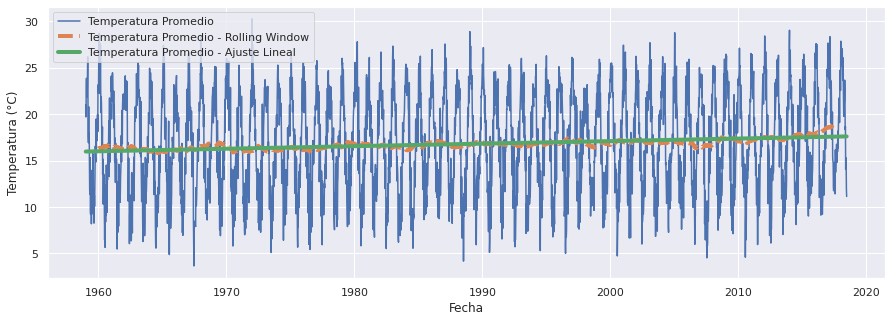

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(semanal.index, semanal.Tmean, label = 'Temperatura Promedio')
plt.plot(semanal_promedio_tendencia, ls = '--', lw = 4, label = 'Temperatura Promedio - Rolling Window')
plt.plot(semanal.index, lr.predict(semanal.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Temperatura Promedio - Ajuste Lineal')
# plt.xlim(datetime.date(1985,1,1), datetime.date(2018,1,1))
# plt.ylim([0,30])
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

¿Qué conclusiones sacarías de ese gráfico?

Falta obtener las restantes componentes. 

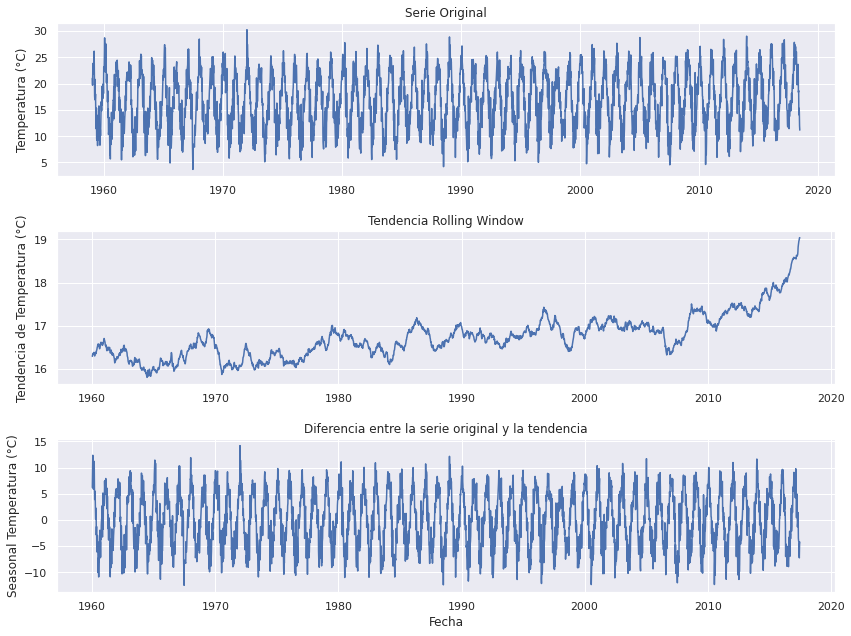

In [ ]:
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Serie Original')
plt.plot(semanal.index, semanal.Tmean)
plt.ylabel('Temperatura (°C)')

plt.subplot(3,1,2)
plt.title('Tendencia Rolling Window')
plt.plot(semanal_promedio_tendencia)
plt.ylabel('Tendencia de Temperatura (°C)')

plt.subplot(3,1,3)
plt.title('Diferencia entre la serie original y la tendencia')
plt.plot(semanal.index, semanal.Tmean - semanal_promedio_tendencia)
plt.xlabel('Fecha')
plt.ylabel('Seasonal Temperatura (°C)')

plt.tight_layout()
plt.show()


Una forma común de interpretar las componentes es parándose en la tendencia y diferenciar el aporte de cada estación. Por ejemplo, podríamos decir que la temperatura promedio de Buenos Aires es de alrededor de 17 grados centígrados, con una componente estacional del orden de -7 grados en invierno y del orden de +7 grados en verano.

Para finalizar, existen varias librerías que ya incorporan técnicas para descomponer series. Una muy conocida es [Statsmodels](https://www.statsmodels.org/stable/index.html), que cuenta con muchas herramientas para análisis estadísticos. Otra, exclusiva de Series de Tiempo y más nueva, es [Prophet](https://facebook.github.io/prophet/), desarrollada por Facebook. En este notebook, mostraremos brevemente el uso de Statsmodels, en el siguiente el de Prophet. Como siempre, es fundamental tener la documentación a mano.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
#https://www.statsmodels.org/stable/index.html
#TSA Time Series analysis
#https://www.statsmodels.org/stable/tsa.html?highlight=tsa#module-statsmodels.tsa

#https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html#statsmodels.tsa.seasonal.seasonal_decompose

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(semanal.Tmean, model='additive') #usa un modelo adaptativo por como se estudia la estacionanlidad
#result = seasonal_decompose(semanal.Tmean, model='multiplicative') #usa un modelo adaptativo por como se estudia la estacionanlidad

# result.plot()
# pyplot.show()

In [ ]:
result.trend

fecha
1959-01-04   NaN
1959-01-11   NaN
1959-01-18   NaN
1959-01-25   NaN
1959-02-01   NaN
              ..
2018-05-20   NaN
2018-05-27   NaN
2018-06-03   NaN
2018-06-10   NaN
2018-06-17   NaN
Freq: W-SUN, Name: Tmean, Length: 3103, dtype: float64

In [ ]:
result.seasonal

fecha
1959-01-04    1.188890
1959-01-11    1.258477
1959-01-18    1.281897
1959-01-25    1.309532
1959-02-01    1.343840
                ...   
2018-05-20    0.671400
2018-05-27    0.660085
2018-06-03    0.608523
2018-06-10    0.621225
2018-06-17    0.623485
Freq: W-SUN, Name: Tmean, Length: 3103, dtype: float64

Grafiquemos.

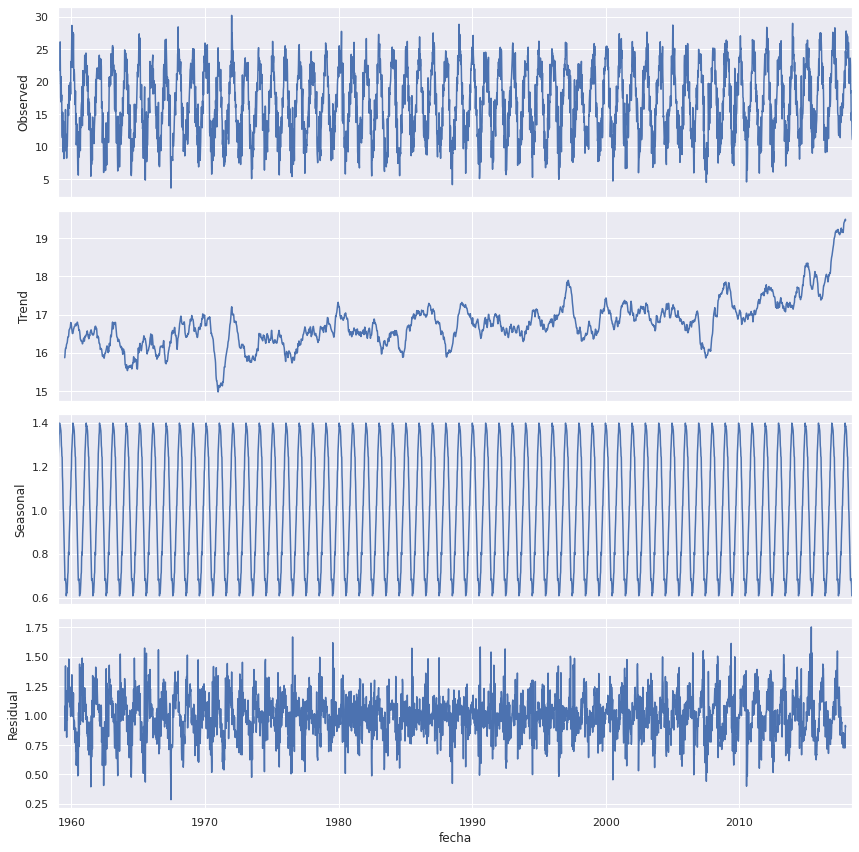

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(semanal.Tmean, model='additive') #usa un modelo adaptativo por como se estudia la estacionanlidad
#
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

In [ ]:
#descompongo la serie en partes, componente tendencial, componente estacional, componente de ruido.
#puedo modelar ambas cosas por separado.

**Ejercicio:** Compara estos gráficos con los que obtuvimos antes y estudia cuál es la diferencia.



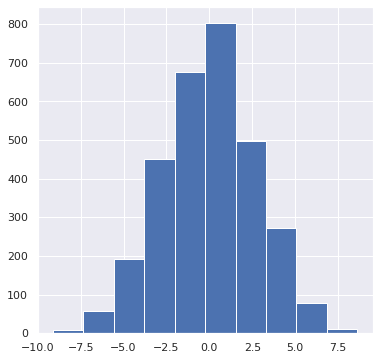

In [ ]:
#Ejercicio: Haz un histograma de los residuos (último gráfico). Recuerda lo que mencionamos en las bitácoras de regresión y decide si el modelo ajustado es apropiado.
matplotlib.rcParams['figure.figsize'] = [6,6]
result.resid.hist()

#queremos un comportamiento de ruido blanco